# Mínimos cuadrados lineales

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados lineales es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de mínimos cuadrados se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/zkbhzv9a2jiw11b/espacio_generado_columnas_de_A.png?dl=0" heigth="400" width="400">

## Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

**Obs:** 

* Si $n=m$ entonces se tiene un problema de interpolación.
* x se nombra variable **regresora**.

## ¿Cómo ajustar el modelo anterior?

En lo siguiente se **asume** $n+1 \leq m+1$ (tenemos más puntos $(x_i,y_i)$'s que parámetros a estimar).

Para realizar el ajuste de mínimos cuadrados se utilizan las ecuaciones normales: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^m
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el sistema de ecuaciones por resolver:

$$R\beta = Q^Ty$$

# Ejemplo

In [1]:
install.packages(c("latex2exp","glmnet"),lib="/usr/local/lib/R/site-library/",
                repos="https://cran.itam.mx/")

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [1]:
inc_index<-function(vec,index,h){
    '
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (double): vector
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (double): vector with vec[index] increased by h.
    '
    vec[index]<-vec[index]+h
    vec
}

In [2]:
gradient_approximation<-function(f,x,h=1e-8){
    '
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.

    '
    n<-length(x)
    gf<-vector("double",n)
    for(i in 1:n){
        gf[i]=(f(inc_index(x,i,h))-f(x))
    }
    gf/h
}

In [3]:
Hessian_approximation<-function(f,x,h=1e-6){
    '
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (double): matrix of numerical approximation to Hessian of f.
    '
    n<-length(x)
    Hf<-matrix(rep(0,n^2),nrow=n,ncol=n)
    f_x<-f(x)
    for(i in 1:n){
        x_inc_in_i<-inc_index(x,i,h)
        f_x_inc_in_i<-f(x_inc_in_i)
        for(j in i:n){
            dif<-f(inc_index(x_inc_in_i,j,h))-f_x_inc_in_i-f(inc_index(x,j,h))+f_x
            Hf[i,j]<-dif
            if(j!=i)
                Hf[j,i]<-dif
        }
    }
    Hf/h^2
}

In [4]:
line_search_by_backtracking<-function(f,dir_desc,x,
                                      der_direct, alpha=.15, beta=.5){
    '
    Line search that sufficiently decreases f restricted to a ray in the direction dir_desc.
    Args:
        alpha (float): parameter in line search with backtracking, tipically .15
        beta (float): parameter in line search with backtracking, tipically .5
        f (expression): definition of function f.
        dir_desc (double): vector of descent direction.
        x (double): vector that holds values where line search will be performed.
        der_direct (float): directional derivative of f.
    Returns:
        t (float): positive number for stepsize along dir_desc that sufficiently decreases f.
    '
    t<-1
    if (alpha > 1/2){
        print('alpha must be less than or equal to 1/2')
        t <- -1
    }
    if (beta>1){
        print('beta must be less than 1')
        t <- -1
    }
    if (t!=-1){
        eval1 <- f(x+t*dir_desc)
        eval2 <- f(x) + alpha*t*der_direct
        while (eval1 > eval2){
            t<-beta*t
            eval1 <- f(x+t*dir_desc)
            eval2 <- f(x)+alpha*t*der_direct
        }
    }else
        t <- -1
    t
}

In [5]:
Euclidian_norm<-function(vec){
    sqrt(sum(vec*vec))
}

In [6]:
compute_error<-function(x_obj,x_approx){
    '
    Relative error between x_obj and x_approx.
    '
    if (Euclidian_norm(x_obj) > .Machine$double.eps){
        Err<-Euclidian_norm(x_obj-x_approx)/Euclidian_norm(x_obj)
    }else
        Err<-Euclidian_norm(x_obj-x_approx)
    Err
}

In [7]:
gradient_descent<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)

    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration<-iteration + 1
    while(normgf>tol && iteration <= maxiter){
        dir_desc <- -gfeval
        der_direct <- sum(gfeval*dir_desc)
        t <- line_search_by_backtracking(f,dir_desc,x,der_direct)
        x <- x + t*dir_desc
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],t))
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

In [8]:
library(ggplot2)
library(latex2exp)
library(glmnet)
library(magrittr)
library(dplyr)

Loading required package: Matrix

Loaded glmnet 3.0-2



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




1) $$\min \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [9]:
set.seed(1989) #para reproducibilidad
mpoints <- 20
df <-  data.frame(x=rnorm(mpoints))
y <- -3*df$x + rnorm(mpoints,2,1)
df$y <- y

In [10]:
gg <- ggplot(data=df, aes(x=x, y=y))

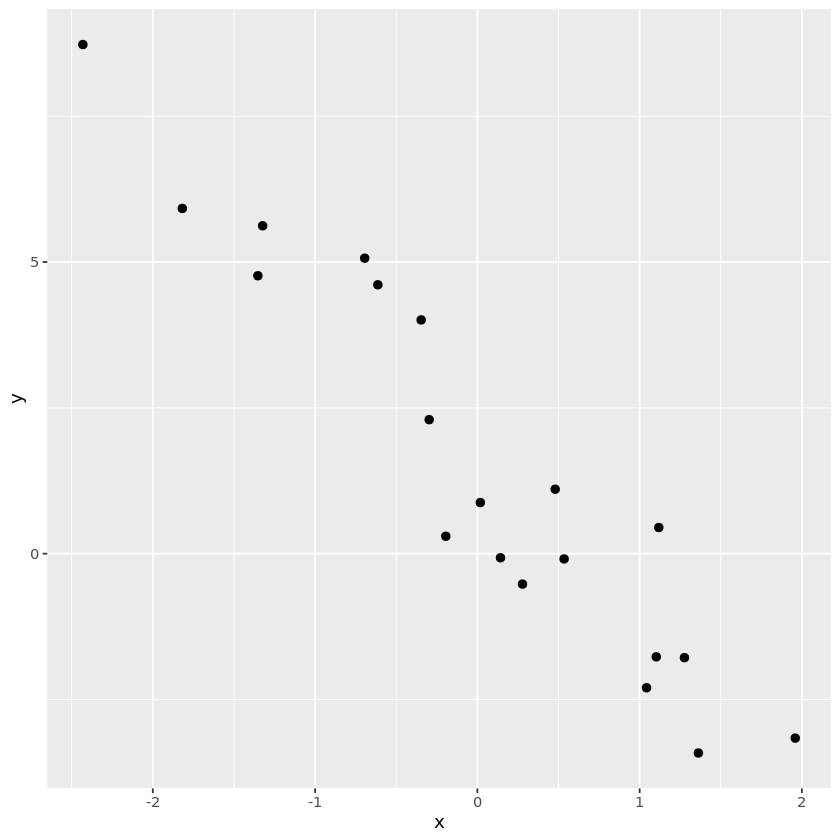

In [11]:
gg + 
geom_point(aes(x=x,y=y),size=2)

In [12]:
linear_model <- lm(df$y~df$x)

In [13]:
linear_model$coefficients

(Intercept)        df$x 
   1.565663   -2.810582

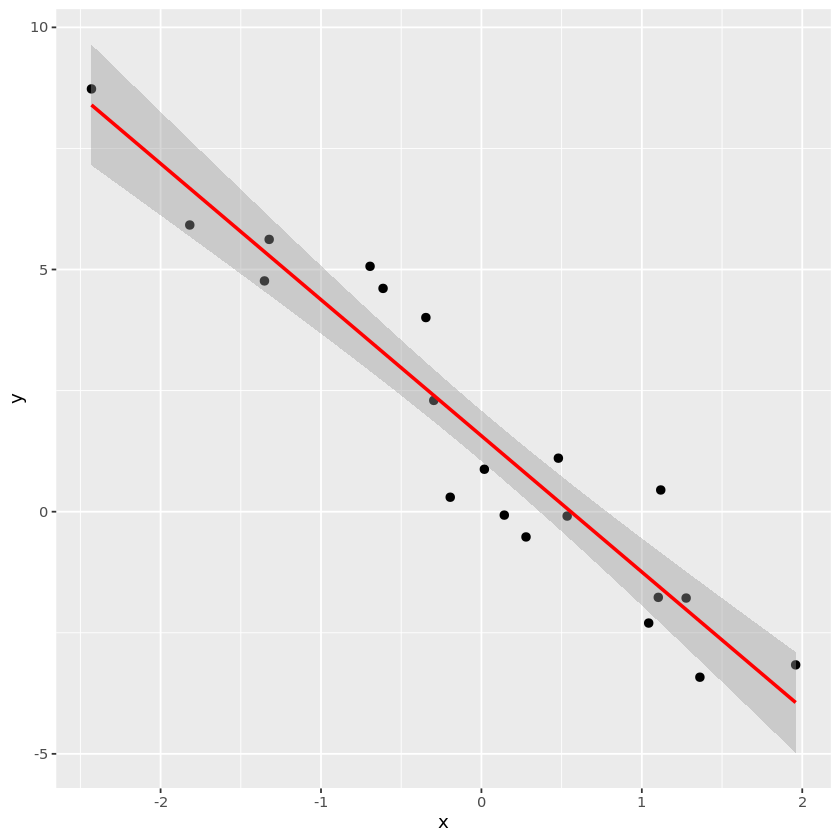

In [14]:
gg +
geom_point(aes(x=x,y=y),size=2) +
geom_smooth(method='lm',colour='red')

Método de descenso gradiente con $\beta_0=(0,0)^T$:

1) $$\min \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [15]:
cte <- sum(y*y)

In [16]:
A <- matrix(c(rep(1,mpoints),df$x),nrow=mpoints)

In [17]:
fo <-function(beta)1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))


In [18]:
beta_0 <- matrix(c(0,0),nrow=2)

In [19]:
beta_ast <- c(linear_model$coefficients[1],linear_model$coefficients[2])


In [20]:
beta_ast

(Intercept)        df$x 
   1.565663   -2.810582

In [21]:
p_ast <- fo(beta_ast)

In [22]:
p_ast

[1] 11.1175

In [23]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [24]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    7.73e+01   1.00e+00      1.24e+02      ---
2    4.17e+01   5.17e-01      3.46e+01      0.0625
3    2.41e+01   2.95e-01      1.14e+01      0.0625
4    1.41e+01   1.73e-01      3.91e+00      0.0625
5    8.27e+00   1.01e-01      1.35e+00      0.0625
6    4.86e+00   5.95e-02      4.65e-01      0.0625
7    2.85e+00   3.49e-02      1.60e-01      0.0625
8    1.68e+00   2.05e-02      5.53e-02      0.0625
9    9.84e-01   1.20e-02      1.91e-02      0.0625
10    5.78e-01   7.07e-03      6.58e-03      0.0625
11    3.39e-01   4.15e-03      2.27e-03      0.0625
12    1.99e-01   2.44e-03      7.83e-04      0.0625
13    1.17e-01   1.43e-03      2.70e-04      0.0625
14    6.88e-02   8.42e-04      9.31e-05      0.0625
15    4.04e-02   4.94e-04      3.21e-05      0.0625
16    2.37e-02   2.90e-04      1.11e-05      0.0625
17    1.39e-02   1.70e-04      3.82e-06      0.0625
18    8.19e-03   1.00e-04      1.32e-06      0.0625
19    4.81e-03   5.89

In [25]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [26]:
print(beta)

          [,1]
[1,]  1.565663
[2,] -2.810582


In [27]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


In [28]:
gg <- ggplot()

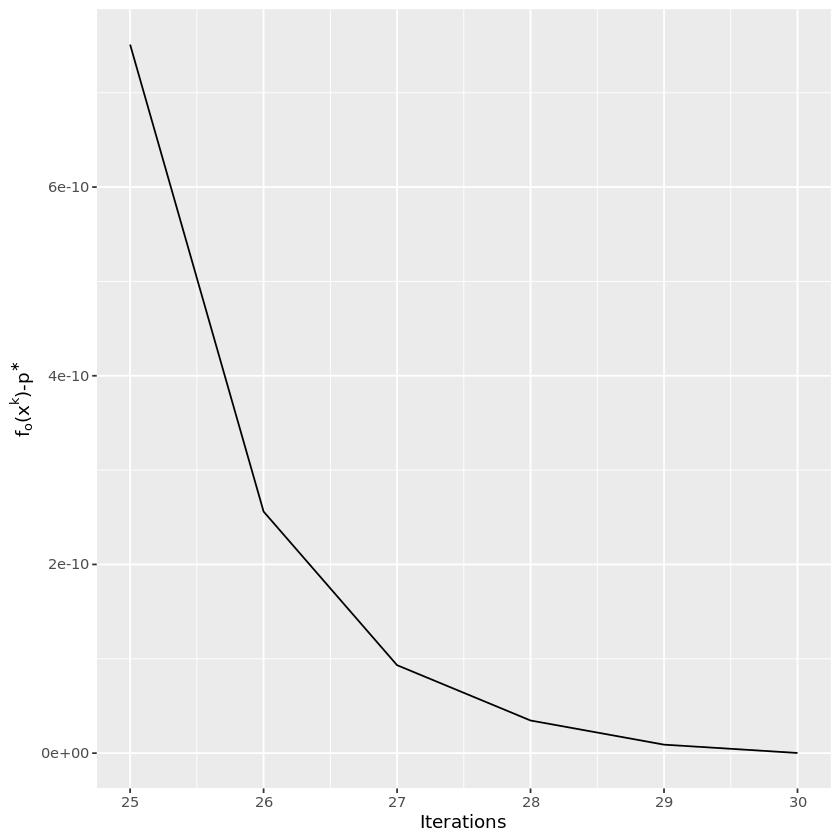

In [29]:
gg +
geom_line(aes(x=25:total_of_iterations,y=Err_plot[25:length(Err_plot)])) + 
xlab('Iterations') + ylab(TeX('f_o(x^k)-p^*'))


# Regularización

Penalización lasso

In [30]:
Hessian_evaluation<-function()1/mpoints*t(A)%*%A

In [31]:
gf_evaluation<- function(beta) 1/mpoints * t(A)%*%(A%*%beta-y) + reg*sign(beta)

**Coordinate descent**

In [32]:
coordinate_descent<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of coordinate descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for coordinate descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)

    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration<-iteration + 1
    while(normgf>tol && iteration <= maxiter){
        ind_maximo <- which.max(abs(gfeval))
        e_canonico <- vector("integer",n)
        e_canonico[ind_maximo] <- 1
        dir_desc <- -gfeval[ind_maximo]*e_canonico
        der_direct <- sum(gfeval*dir_desc)
        t <- line_search_by_backtracking(f,dir_desc,x,der_direct)
        x <- x + t*dir_desc
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],t))
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

**Newtons method**

In [33]:
Newtons_method<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)
    Hfeval <- Hessian_approximation(f,x)
    condHf <- kappa(Hfeval, exact=TRUE)
    
    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    #Newton's direction and Newton's decrement
    dir_Newton <- solve(Hfeval, gfeval)
    dec_Newton <- sum(dir_Newton*(Hfeval%*%dir_Newton))
    dir_Newton <- -dir_Newton
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search    condHf\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---", condHf))
    
    stopping_criteria <- dec_Newton/2
    iteration<-iteration + 1
    while(stopping_criteria>tol && iteration <= maxiter){
        der_direct <- -dec_Newton
        t <- line_search_by_backtracking(f,dir_Newton,x,der_direct)
        x <- x + t*dir_Newton
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        Hfeval <- Hessian_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        condHf <- kappa(Hfeval, exact=TRUE)
        #Newton's direction and Newton's decrement
        dir_Newton = solve(Hfeval, gfeval)
        dec_Newton = sum(dir_Newton*(Hfeval%*%dir_Newton))
        dir_Newton <- -dir_Newton
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %0.2e    %0.2e\n",iteration,normgf,Err,Err_plot_aux[iteration],t,condHf))
        stopping_criteria = dec_Newton/2
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

In [34]:
reg<-.5

In [35]:
quita_signo<-function(beta){
    beta<-sign(beta)*beta
    ind <- beta < .Machine$double.xmin & beta > -.Machine$double.xmin 
    beta[ind] <- .Machine$double.xmin 
    beta
    }

In [36]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta))


In [37]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta[2:length(beta)]))


In [38]:
beta_0<-c(0,2)

In [39]:
gf_evaluation(beta_0)

-1.507055
6.587020


In [40]:
gradient_approximation(fo,beta_0)

[1] -1.507055  6.587020

In [41]:
beta_0 <- matrix(c(0,0),nrow=2)

In [42]:
gradient_approximation(fo,beta_0)

[1] -1.531421  4.048410

In [43]:
gf_evaluation(beta_0)

-1.531421
3.548410


In [44]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,thresh=1e-8)

In [45]:
print(as.matrix(fit$beta))

          s0
V1  0.000000
V2 -2.416619


In [46]:
beta_ast <- as.matrix(fit$beta)


In [47]:
beta_ast

,s0
V1,0.000000
V2,-2.416619


In [48]:
p_ast <- fo(beta_ast)

In [49]:
p_ast

[1] 3.080822

In [50]:
beta_0<-c(0,0)

In [51]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [52]:
Hessian_approximation(fo,beta_0)

0.99831254,0.01065814
0.01065814,1.26831878


In [53]:
Hessian_evaluation()

1.00000000,0.01218318
0.01218318,1.26930474


In [54]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.33e+00   1.00e+00      3.66e+00      ---
2    1.63e+00   1.62e-01      9.03e-02      0.5
3    4.98e-01   6.64e-01      1.12e+00      1
4    1.34e-01   6.45e-01      1.21e+00      1
5    3.64e-02   6.44e-01      1.22e+00      1
6    1.09e-02   6.44e-01      1.22e+00      1
7    5.43e-03   6.44e-01      1.22e+00      1
8    2.68e-03   6.46e-01      1.22e+00      1
9    7.22e-04   6.46e-01      1.22e+00      1
10    1.95e-04   6.46e-01      1.22e+00      1
11    5.82e-05   6.46e-01      1.22e+00      1
12    2.91e-05   6.46e-01      1.22e+00      1
13    1.42e-05   6.46e-01      1.22e+00      1
14    3.71e-06   6.46e-01      1.22e+00      1
15    9.77e-07   6.46e-01      1.22e+00      1
16    4.92e-07   6.46e-01      1.22e+00      1
17    2.66e-07   6.46e-01      1.22e+00      1
18    7.02e-08   6.46e-01      1.22e+00      1
19    2.78e-07   6.46e-01      1.22e+00      1
20    2.66e-07   6.46e-01      1.22e+00      0.5
21    1.

In [55]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [56]:
print(beta)

[1]  1.560863 -2.416619


In [57]:
print(beta_ast)

          s0
V1  0.000000
V2 -2.416619


In [58]:
fo(beta)

[1] 1.862675

In [59]:
beta_plot

0.000000,1.556082,1.556082,1.556082,1.556082,1.556082,1.560837,1.560837,1.560837,1.560837,⋯,1.560863,1.560863,1.560863,1.560863,1.560863,1.560863,1.560863,1.560863,1.560863,1.560863
-2.024205,-2.024205,-2.522240,-2.388117,-2.424237,-2.414510,-2.414510,-2.417187,-2.416466,-2.416660,⋯,-2.416619,-2.416619,-2.416619,-2.416619,-2.416619,-2.416619,-2.416619,-2.416619,-2.416619,-2.416619


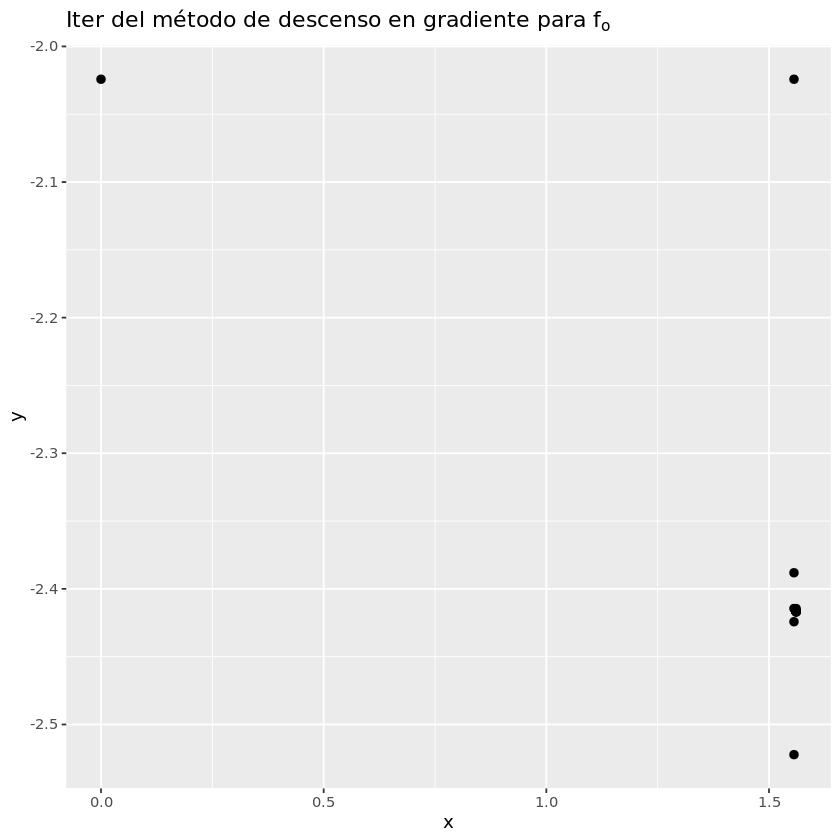

In [60]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

In [61]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search    condHf
1    4.33e+00   1.00e+00      3.66e+00      ---
2    1.00e+00   7.26e-01      8.24e-01      1.00e+00    1.27e+00
3    3.68e-03   6.46e-01      1.22e+00      1.00e+00    1.27e+00
4    2.53e-07   6.46e-01      1.22e+00      1.00e+00    1.27e+00
Error of x with respect to x_ast: 6.46e-01
Approximate solution:[1]  1.560863 -2.416620


In [62]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [63]:
print(beta)

[1]  1.560863 -2.416620


In [64]:
print(beta_ast)

          s0
V1  0.000000
V2 -2.416619


In [65]:
fo(beta)

[1] 1.862675

In [66]:
beta_plot

1.568228,1.561673,1.560863
-3.205128,-2.413804,-2.416620


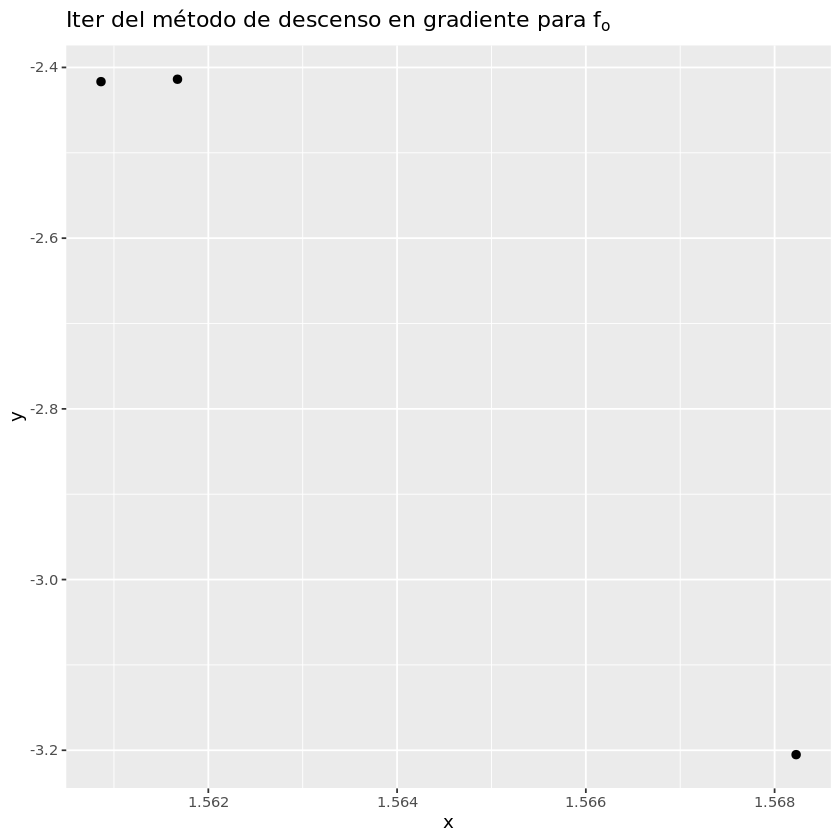

In [67]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

Modelo sin intercepto

In [68]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [69]:
A<-X[,c(2,4)]

In [70]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [71]:
cte

[1] 14042.31

In [72]:
mpoints

[1] 32

In [73]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta))


In [74]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [75]:
beta_ast <- as.matrix(fit$beta)


In [76]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [77]:
beta_0<-c(1,1)

**Newtons method**

In [78]:
gradient_approximation(fo,beta_0)

[1] 64876.0375   723.5409

In [79]:
gf_evaluation(beta_0)

disp,64876.0371
drat,723.5409


In [80]:
Hessian_approximation(fo,beta_0)

68106.6012,774.889486
774.8895,3.637979


In [81]:
Hessian_evaluation()

,disp,drat
disp,68113.3584,784.21238
drat,784.2124,13.21221


In [82]:
beta_0

[1] 1 1

In [83]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [84]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search    condHf
1    6.49e+04   8.62e-01      3.10e+04      ---
2    4.89e+01   1.28e+00      1.50e+02      1.00e+00    1.64e+04
3    1.42e+00   4.42e-02      1.78e-01      1.00e+00    1.66e+04
4    2.95e-02   8.68e-04      7.21e-05      1.00e+00    1.62e+04
5    3.69e-04   1.65e-05      6.86e-08      1.00e+00    1.57e+04
Error of x with respect to x_ast: 1.65e-05
Approximate solution:[1] -0.01682385  6.59064139


In [85]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [86]:
print(beta)

[1] -0.01682385  6.59064139


In [87]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [88]:
fo(beta)

[1] 9.777368

In [89]:
beta_plot

1,0.07949562,-0.02019068,-0.01675652,-0.01682385
1,-1.81796641,6.88212076,6.58481401,6.59064139


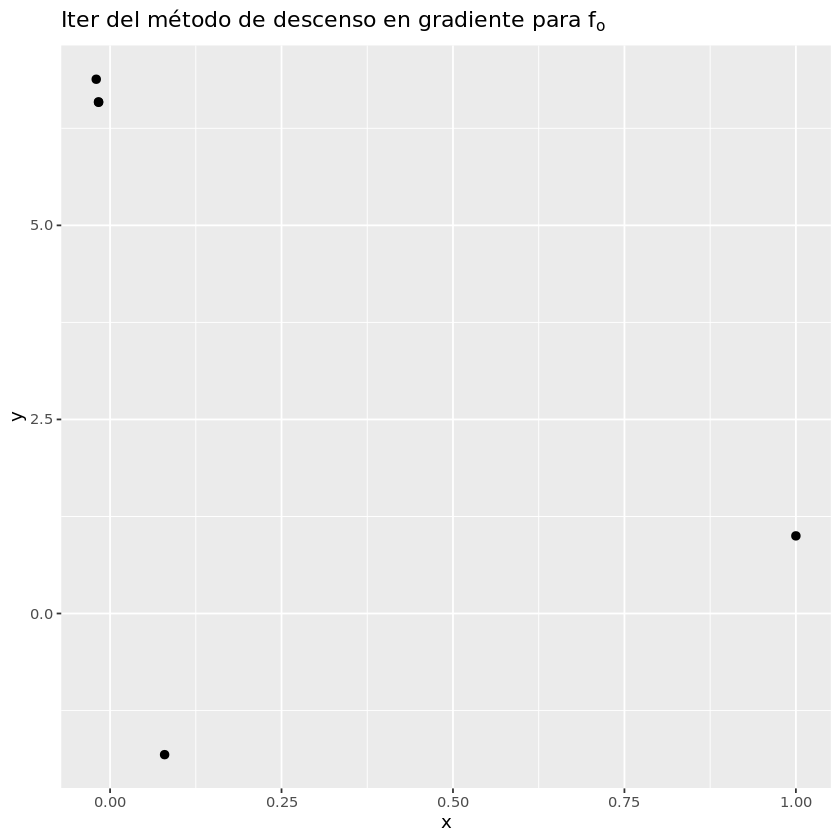

In [90]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**Cambiando parámetro de regularización**

In [91]:
reg<-0.2

In [92]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [93]:
beta_ast <- as.matrix(fit$beta)


In [94]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [95]:
beta_0<-c(1,1)

In [96]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


**Newtons method**

In [97]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search    condHf
1    6.49e+04   8.64e-01      3.10e+04      ---
2    9.82e+01   2.54e+00      6.05e+02      1.00e+00    1.60e+04
3    2.51e+00   3.73e-02      1.30e-01      1.00e+00    1.60e+04
4    1.66e-02   5.24e-04      2.77e-05      1.00e+00    1.66e+04
5    5.20e-04   3.37e-05      6.50e-08      1.00e+00    1.59e+04
Error of x with respect to x_ast: 3.37e-05
Approximate solution:[1] -0.01766474  6.66329488


In [98]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [99]:
print(beta)

[1] -0.01766474  6.66329488


In [100]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [101]:
fo(beta)

[1] 7.784107

In [102]:
beta_plot

1,0.1764839,-0.01483255,-0.01762187,-0.01766474
1,-10.2852230,6.41439908,6.65957987,6.66329488


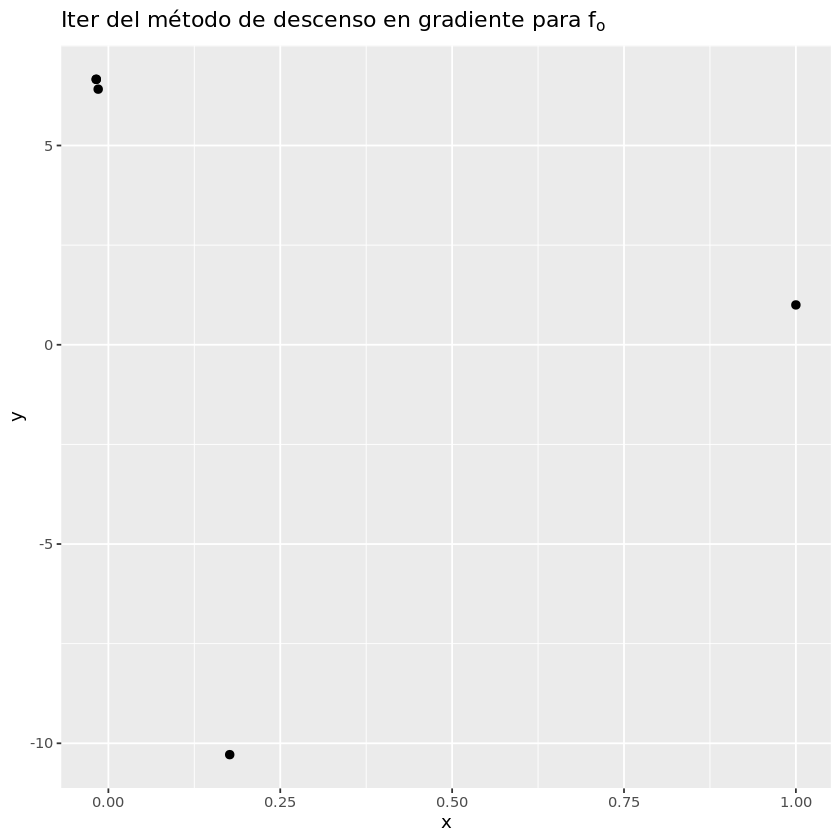

In [103]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

In [104]:
beta_0<-c(0,0)

In [105]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.02e+03   1.00e+00      2.12e+02      ---
2    1.60e+02   1.00e+00      9.31e+01      1.52587890625e-05
3    2.86e+01   1.00e+00      9.29e+01      1.52587890625e-05
4    2.73e+03   4.76e-01      7.59e+01      0.125
5    1.08e+02   4.76e-01      2.11e+01      1.52587890625e-05
6    1.39e+01   4.76e-01      2.10e+01      1.52587890625e-05
7    1.30e+03   2.28e-01      1.72e+01      0.125
8    5.20e+01   2.28e-01      4.84e+00      1.52587890625e-05
9    6.64e+00   2.28e-01      4.82e+00      1.52587890625e-05
10    6.22e+02   1.09e-01      3.95e+00      0.125
11    2.47e+01   1.09e-01      1.11e+00      1.52587890625e-05
12    3.18e+00   1.09e-01      1.11e+00      1.52587890625e-05
13    2.98e+02   5.22e-02      9.05e-01      0.125
14    1.18e+01   5.22e-02      2.55e-01      1.52587890625e-05
15    1.52e+00   5.22e-02      2.54e-01      1.52587890625e-05
16    1.43e+02   2.50e-02      2.08e-01      0.125
17    5.66e+00   2.5

In [106]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [107]:
print(beta)

[1] -0.01756272  6.65444873


In [108]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [109]:
fo(beta)

[1] 7.784268

In [110]:
beta_plot

0.06136831,0.05895485,0.05895485,0.01724231,0.01888275,0.01888275,-0.0009476207,-0.0001616408,-0.0001616408,-0.00965363,⋯,-0.01674264,-0.01674264,-0.01724231,-0.01722266,-0.01722266,-0.01746201,-0.0174526,-0.0174526,-0.01756723,-0.01756272
0.00000000,0.00000000,3.49381608,3.49381608,3.49381608,5.14563299,5.1456329864,5.1456329864,5.9362877280,5.93628773,⋯,6.58333947,6.62496245,6.62496245,6.62496245,6.64489965,6.64489965,6.6448997,6.6544487,6.65444873,6.65444873


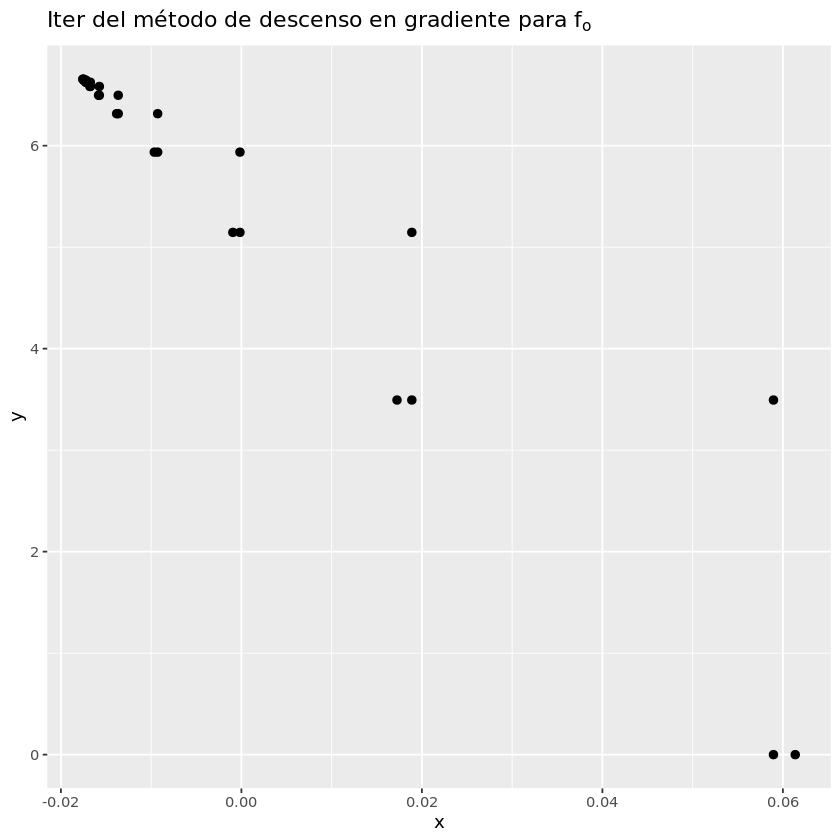

In [111]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**gradient descent**

In [112]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.02e+03   1.00e+00      2.12e+02      ---
2    1.61e+02   1.00e+00      9.30e+01      1.52587890625e-05
3    2.86e+01   1.00e+00      9.28e+01      1.52587890625e-05
4    2.04e+02   9.98e-01      9.28e+01      0.00048828125
5    2.89e+01   9.98e-01      9.25e+01      1.52587890625e-05
6    1.28e+02   9.97e-01      9.24e+01      0.000244140625
7    2.82e+01   9.97e-01      9.23e+01      1.52587890625e-05
8    1.61e+02   9.95e-01      9.21e+01      0.00048828125
9    2.84e+01   9.95e-01      9.19e+01      1.52587890625e-05
10    2.04e+02   9.93e-01      9.18e+01      0.00048828125
11    2.88e+01   9.92e-01      9.15e+01      1.52587890625e-05
12    1.28e+02   9.91e-01      9.14e+01      0.000244140625
13    2.81e+01   9.91e-01      9.13e+01      1.52587890625e-05
14    1.61e+02   9.89e-01      9.11e+01      0.00048828125
15    2.83e+01   9.89e-01      9.09e+01      1.52587890625e-05
16    2.04e+02   9.87e-01      9.08e+01      

In [113]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [114]:
print(beta)

[1] 0.05901972 0.16175495


In [115]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [116]:
fo(beta)

[1] 96.33409

In [117]:
beta_plot

0.061368308,0.058941308,0.06184346,0.05875461,0.06062378,0.05871641,0.06096286,0.05853562,0.06143894,0.05834978,⋯,0.05773067,0.06063629,0.05754652,0.05941755,0.05750965,0.05975933,0.05733139,0.06023815,0.05714807,0.05901972
0.001131953,0.001529336,0.01517238,0.01556124,0.02237325,0.02277526,0.03636735,0.03676248,0.05033357,0.05072019,⋯,0.10667081,0.12009913,0.12048129,0.12718616,0.12758147,0.14095952,0.14134797,0.15470547,0.15508541,0.16175495


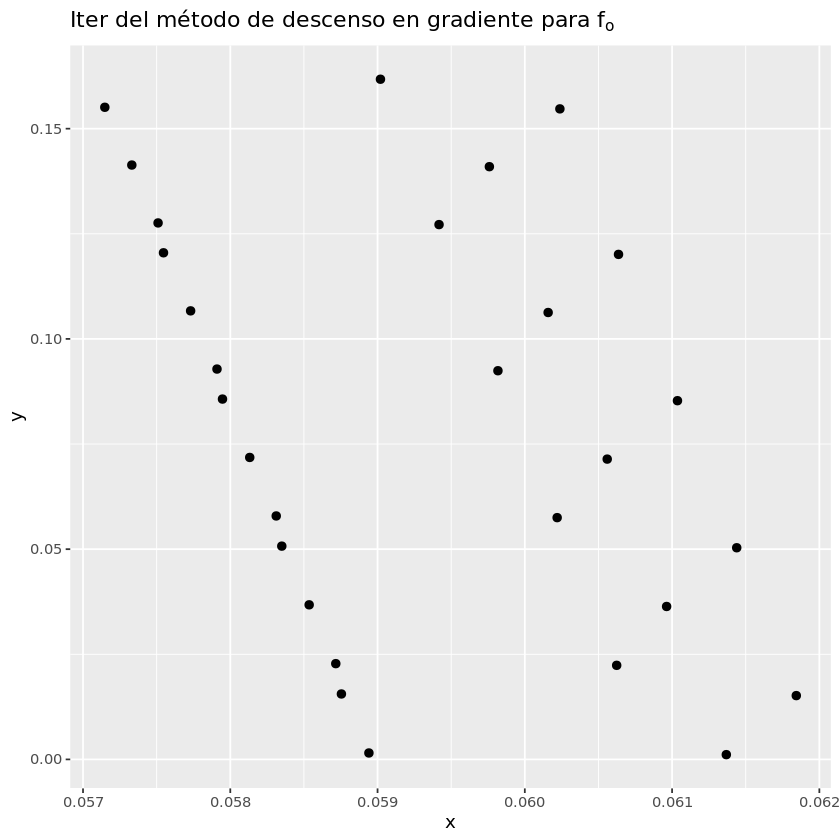

In [118]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**More columns**

In [119]:
A<-X[,c(2,4,5,6)]

In [120]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [121]:
beta_ast <- as.matrix(fit$beta)


In [122]:
print(beta_ast)

                s0
disp  0.0006973293
drat  2.6120443627
wt   -3.6222009972
qsec  1.2403485581


In [123]:
beta_0<-c(1,1,1,1)

In [124]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


**Newtons method**

In [125]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search    condHf
1    6.99e+04   1.08e+00      3.57e+04      ---
2    1.62e+01   1.41e+00      6.99e+00      1.00e+00    4.71e+05
3    1.58e+00   1.00e+00      2.09e+00      1.00e+00    5.34e+05
4    3.38e-01   1.89e-01      1.33e-01      1.00e+00    3.24e+05
5    3.03e-01   3.61e-02      4.24e-03      1.00e+00    7.76e+05
6    2.92e-02   5.76e-03      6.96e-05      1.00e+00    5.27e+05
7    5.44e-03   7.19e-04      1.07e-05      1.00e+00    3.14e+05
8    2.18e-03   1.62e-03      1.64e-05      1.00e+00    3.32e+06
9    3.01e-03   3.30e-03      2.16e-05      1.25e-01    4.48e+05
10    1.01e-04   3.43e-03      2.20e-05      1.00e+00    1.97e+06
Error of x with respect to x_ast: 3.43e-03
Approximate solution:[1]  0.0006261966  2.6223707978 -3.6105443552  1.2371047935


In [126]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [127]:
print(beta)

[1]  0.0006261966  2.6223707978 -3.6105443552  1.2371047935


In [128]:
print(beta_ast)

                s0
disp  0.0006973293
drat  2.6120443627
wt   -3.6222009972
qsec  1.2403485581


In [129]:
fo(beta)

[1] 4.595929

In [130]:
beta_plot

1,-0.05606289,-0.01851005,-0.003576263,0.0009944162,0.0005168405,0.0007160974,0.0006791189,0.0006377508,0.0006261966
1,-0.12200766,5.97538040,1.869463441,2.7751959837,2.6038033655,2.6095959668,2.6183362938,2.6231848830,2.6223707978
1,2.31423223,-0.55655647,-3.169499864,-3.6324961838,-3.5968211157,-3.6243745447,-3.6184323138,-3.6122536944,-3.6105443552
1,1.48267081,0.26564075,1.362212247,1.2057895393,1.2396914838,1.2409809623,1.2386540494,1.2371100579,1.2371047935


**Ridge**

In [131]:
reg<-.5

In [132]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [133]:
#A<-X[,c(2,4)]
A<-X[,c(2,4,5,6)]

In [134]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [135]:
cte

[1] 14042.31

In [136]:
mpoints

[1] 32

In [137]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg/2*sum(beta*beta)


In [138]:
fo

function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg/2*sum(beta*beta)

In [139]:
Hessian_evaluation<-function(beta)1/mpoints*t(A)%*%A + reg*diag(rep(length(beta)))

In [140]:
gf_evaluation<- function(beta) 1/mpoints * t(A)%*%(A%*%beta-y) + reg*beta

In [141]:
beta_0<-c(1.5,1,1,1)

In [142]:
gradient_approximation(fo,beta_0)

[1] 103804.620   1191.135   1290.350   6118.188

In [143]:
gf_evaluation(beta_0)

disp,103804.622
drat,1191.136
wt,1290.350
qsec,6118.187


In [144]:
Hessian_approximation(fo,beta_0)

68117.5152,742.14768,844.01108,4030.88052
742.1477,58.20766,29.10383,87.31149
844.0111,29.10383,29.10383,58.20766
4030.8805,87.31149,58.20766,334.69405


In [145]:
Hessian_evaluation(beta_0)

,disp,drat,wt,qsec
disp,68113.8584,784.21238,846.60903,4025.04700
drat,784.2124,13.71221,11.20997,64.27856
wt,846.6090,11.20997,11.77816,57.12796
qsec,4025.0470,64.27856,57.12796,322.17126


In [146]:
beta_0

[1] 1.5 1.0 1.0 1.0

In [147]:
beta_0<-c(0,0,0,0)

In [148]:
gradient_approximation(fo,beta_0)

[1] -4022.03341   -74.38366   -59.67977  -362.96078

In [149]:
gf_evaluation(beta_0)

disp,-4022.03375
drat,-74.38366
wt,-59.67977
qsec,-362.96078


In [150]:
Hessian_approximation(fo,beta_0)

68113.8204,784.21181,846.62588,4025.05407
784.2118,13.72769,11.22658,64.28991
846.6259,11.22658,11.79501,57.12764
4025.0541,64.28991,57.12764,322.16008


In [151]:
Hessian_evaluation(beta_0)

,disp,drat,wt,qsec
disp,68113.8584,784.21238,846.60903,4025.04700
drat,784.2124,13.71221,11.20997,64.27856
wt,846.6090,11.20997,11.77816,57.12796
qsec,4025.0470,64.27856,57.12796,322.17126


In [152]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [153]:
beta_ast <- as.matrix(fit$beta)


In [154]:
print(beta_ast)

               s0
disp -0.002266897
drat  2.574343046
wt   -3.235364158
qsec  1.216575201


In [155]:
beta_0<-c(0,0,0,0)

**Newtons method**

In [156]:
beta_0

[1] 0 0 0 0

In [177]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [178]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search    condHf
1    4.04e+03   1.00e+00      2.12e+02      ---
2    2.26e-02   5.28e-01      1.90e+00      1.00e+00    9.34e+04
3    3.07e-03   5.27e-01      1.90e+00      1.00e+00    1.21e+05
4    7.55e-04   5.27e-01      1.90e+00      1.00e+00    1.24e+05
5    7.47e-05   5.27e-01      1.90e+00      1.00e+00    1.07e+05
Error of x with respect to x_ast: 5.27e-01
Approximate solution:[1] -0.01818806  1.57681450 -1.19395750  1.25095429


In [179]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [180]:
print(beta)

[1] -0.01818806  1.57681450 -1.19395750  1.25095429


In [181]:
print(beta_ast)

               s0
disp -0.002266897
drat  2.574343046
wt   -3.235364158
qsec  1.216575201


In [162]:
fo(beta)

[1] 5.946858

In [163]:
beta_plot

-0.01814363,-0.01816322,-0.01819045,-0.01818806,-0.01818871,-0.01818874,-0.01818876,-0.01818877,-0.01818877,-0.01818877,⋯,-0.01818877,-0.01818877,-0.01818877,-0.01818877,-0.01818877,-0.01818877,-0.01818877,-0.01818877,-0.01818877,-0.01818877
1.55616018,1.57502924,1.57745397,1.57681450,1.57683735,1.57684258,1.57684266,1.57684249,1.57684249,1.57684249,⋯,1.57684248,1.57684248,1.57684248,1.57684248,1.57684248,1.57684248,1.57684248,1.57684248,1.57684248,1.57684248
-1.20239992,-1.19746132,-1.19357550,-1.19395750,-1.19386751,-1.19386388,-1.19386079,-1.19386003,-1.19386003,-1.19386004,⋯,-1.19386004,-1.19386004,-1.19386004,-1.19386004,-1.19386004,-1.19386004,-1.19386004,-1.19386004,-1.19386004,-1.19386004
1.25600518,1.25161864,1.25078981,1.25095429,1.25094206,1.25094067,1.25094046,1.25094040,1.25094040,1.25094040,⋯,1.25094040,1.25094040,1.25094040,1.25094040,1.25094040,1.25094040,1.25094040,1.25094040,1.25094040,1.25094040


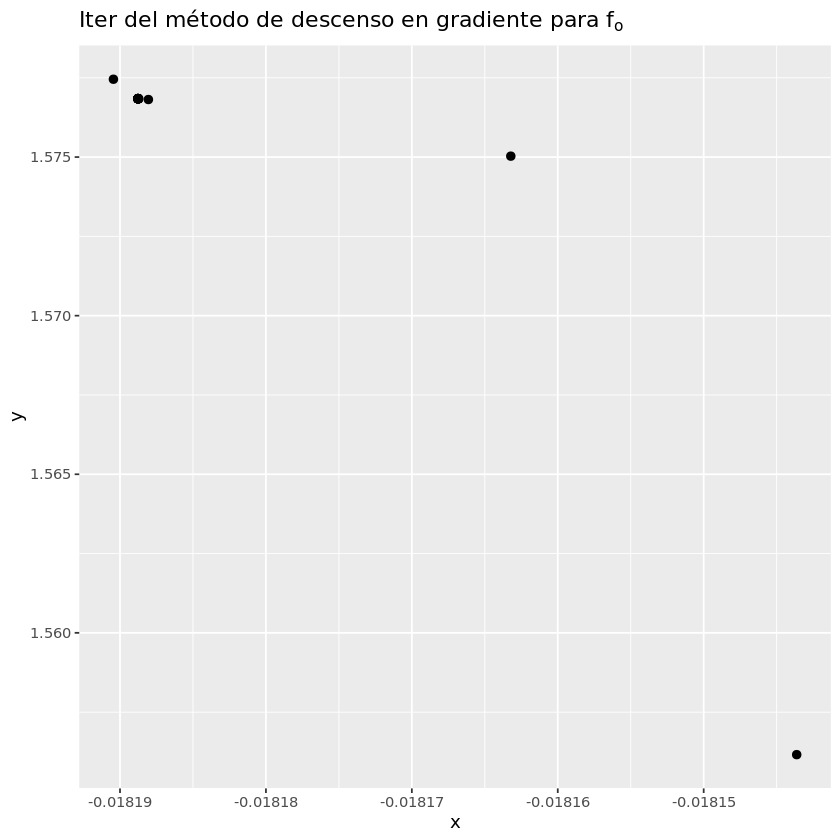

In [164]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

In [165]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.04e+03   1.00e+00      2.12e+02      ---
2    1.98e+02   1.00e+00      9.30e+01      1.52587890625e-05
3    1.29e+02   1.00e+00      9.28e+01      1.52587890625e-05
4    1.97e+03   9.74e-01      6.99e+01      0.00390625
5    1.20e+02   9.74e-01      4.15e+01      1.52587890625e-05
6    1.31e+03   9.63e-01      3.02e+01      0.00390625
7    7.89e+01   9.63e-01      1.75e+01      1.52587890625e-05
8    8.57e+02   9.60e-01      1.27e+01      0.00390625
9    5.15e+01   9.60e-01      7.31e+00      1.52587890625e-05
10    5.59e+02   9.59e-01      5.25e+00      0.00390625
11    3.37e+01   9.59e-01      2.96e+00      1.52587890625e-05
12    3.65e+02   9.60e-01      2.08e+00      0.00390625
13    2.21e+01   9.60e-01      1.11e+00      1.52587890625e-05
14    2.38e+02   9.60e-01      7.34e-01      0.00390625
15    1.45e+01   9.60e-01      3.20e-01      1.52587890625e-05
16    1.55e+02   9.60e-01      1.61e-01      0.00390625
17    9.6

In [166]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [167]:
print(beta)

[1] -0.03003033  0.17906435  0.00000000  1.47198616


In [168]:
print(beta_ast)

               s0
disp -0.002266897
drat  2.574343046
wt   -3.235364158
qsec  1.216575201


In [169]:
fo(beta)

[1] 7.367126

In [170]:
beta_plot

0.06137136,0.05895732,0.05895732,0.02890624,0.02890624,0.008861516,0.008861516,-0.004219583,-0.004219583,-0.01275184,⋯,-0.02686602,-0.02686602,-0.02752299,-0.02752299,-0.0279515,-0.0279515,-0.02919589,-0.02914694,-0.02914694,-0.03003033
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.1054010,0.10540102,0.10540102,0.17906435,0.17906435
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,0.49083910,0.49083910,0.83645455,0.836454553,1.062279338,1.062279338,1.209579842,1.20957984,⋯,1.45324634,1.46458836,1.46458836,1.47198616,1.4719862,1.4719862,1.47198616,1.47198616,1.47198616,1.47198616


In [171]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.04e+03   1.00e+00      2.12e+02      ---
2    2.17e+02   1.00e+00      9.23e+01      1.52587890625e-05
3    2.29e+02   9.99e-01      9.19e+01      3.0517578125e-05
4    2.42e+02   9.99e-01      9.14e+01      3.0517578125e-05
5    2.58e+02   9.99e-01      9.10e+01      3.0517578125e-05
6    2.74e+02   9.98e-01      9.06e+01      3.0517578125e-05
7    2.93e+02   9.98e-01      9.01e+01      3.0517578125e-05
8    3.14e+02   9.98e-01      8.98e+01      3.0517578125e-05
9    1.26e+02   9.98e-01      8.89e+01      1.52587890625e-05
10    1.65e+03   9.80e-01      8.05e+01      0.001953125
11    1.26e+02   9.80e-01      6.05e+01      1.52587890625e-05
12    2.49e+02   9.79e-01      6.02e+01      6.103515625e-05
13    1.04e+02   9.79e-01      5.97e+01      1.52587890625e-05
14    1.30e+03   9.66e-01      5.30e+01      0.001953125
15    1.02e+02   9.66e-01      4.06e+01      1.52587890625e-05
16    1.97e+02   9.66e-01      4.03e+01    

In [172]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [173]:
print(beta)

[1] 0.004279252 0.205278374 0.066525382 0.899007102


In [174]:
print(beta_ast)

               s0
disp -0.002266897
drat  2.574343046
wt   -3.235364158
qsec  1.216575201


In [175]:
fo(beta)

[1] 19.63283

In [176]:
beta_plot

0.0613713594,0.055812283,0.061356524,0.054837957,0.061427394,0.053775854,0.061598968,0.057104308,0.06638388,0.04118335,⋯,0.01624017,0.01849698,-0.002597636,0.01066072,0.008144258,0.009918957,-0.006960285,0.003476457,0.001488231,0.004279252
0.0011350045,0.001924608,0.002840018,0.003614141,0.004537196,0.005293861,0.006226759,0.006595194,0.06042558,0.06048518,⋯,0.14673379,0.14699905,0.177339900,0.17769337,0.178465769,0.178685594,0.203978047,0.204266036,0.204912916,0.205278374
0.0009106411,0.001135933,0.001498435,0.001710055,0.002083819,0.002279618,0.002666998,0.002755719,0.02135455,0.02115816,⋯,0.04920217,0.04930356,0.058412031,0.05863503,0.058835839,0.058915545,0.066070591,0.066245544,0.066401148,0.066525382
0.0055383420,0.009018228,0.013144805,0.016547358,0.020715276,0.024030342,0.028250864,0.029858649,0.26992173,0.26997815,⋯,0.64874391,0.64990882,0.780498877,0.78213502,0.785388061,0.786338952,0.893466552,0.894782487,0.897454623,0.899007102


In [174]:
?glmnet

glmnet {glmnet},R Documentation
x,"input matrix, of dimension nobs x nvars; each row is an observation vector. Can be in sparse matrix format (inherit from class ""sparseMatrix"" as in package Matrix; not yet available for family=""cox"")"
y,"response variable. Quantitative for family=""gaussian"", or family=""poisson"" (non-negative counts). For family=""binomial"" should be either a factor with two levels, or a two-column matrix of counts or proportions (the second column is treated as the target class; for a factor, the last level in alphabetical order is the target class). For family=""multinomial"", can be a nc>=2 level factor, or a matrix with nc columns of counts or proportions. For either ""binomial"" or ""multinomial"", if y is presented as a vector, it will be coerced into a factor. For family=""cox"", y should be a two-column matrix with columns named 'time' and 'status'. The latter is a binary variable, with '1' indicating death, and '0' indicating right censored. The function Surv() in package survival produces such a matrix. For family=""mgaussian"", y is a matrix of quantitative responses."
family,Response type (see above)
weights,observation weights. Can be total counts if responses are proportion matrices. Default is 1 for each observation
offset,"A vector of length nobs that is included in the linear predictor (a nobs x nc matrix for the ""multinomial"" family). Useful for the ""poisson"" family (e.g. log of exposure time), or for refining a model by starting at a current fit. Default is NULL. If supplied, then values must also be supplied to the predict function."
alpha,"The elasticnet mixing parameter, with 0≤α≤ 1. The penalty is defined as (1-α)/2||β||_2^2+α||β||_1. alpha=1 is the lasso penalty, and alpha=0 the ridge penalty."
nlambda,The number of lambda values - default is 100.
lambda.min.ratio,"Smallest value for lambda, as a fraction of lambda.max, the (data derived) entry value (i.e. the smallest value for which all coefficients are zero). The default depends on the sample size nobs relative to the number of variables nvars. If nobs > nvars, the default is 0.0001, close to zero. If nobs < nvars, the default is 0.01. A very small value of lambda.min.ratio will lead to a saturated fit in the nobs < nvars case. This is undefined for ""binomial"" and ""multinomial"" models, and glmnet will exit gracefully when the percentage deviance explained is almost 1."
lambda,"A user supplied lambda sequence. Typical usage is to have the program compute its own lambda sequence based on nlambda and lambda.min.ratio. Supplying a value of lambda overrides this. WARNING: use with care. Avoid supplying a single value for lambda (for predictions after CV use predict() instead). Supply instead a decreasing sequence of lambda values. glmnet relies on its warms starts for speed, and its often faster to fit a whole path than compute a single fit."
standardize,"Logical flag for x variable standardization, prior to fitting the model sequence. The coefficients are always returned on the original scale. Default is standardize=TRUE. If variables are in the same units already, you might not wish to standardize. See details below for y standardization with family=""gaussian""."


**Referencias:**

* Ver [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb) para una introducción al problema de mínimos cuadrados con ejemplos en Python3.